# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    # enumerate參數為可遍歷/可叠代的對象(如列表、字符串)多用於在for循環中得到計數，利用它可以同時獲得索引和值
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256

In [7]:
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
def Training_model(ch, lr, results):
    #for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        # choise optimizer
        if(ch == 0):
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=1, momentum=0.95, decay=0.0)
        elif(ch == 1):
            optimizer = keras.optimizers.RMSprop(lr=lr, epsilon=None, decay=0.0)
        elif(ch == 2):
            optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
        else:
            optimizer = keras.optimizers.Adam(lr=lr, epsilon=None, decay=0.0)
   
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        
        score = model.evaluate(x_test, y_test, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

def Draw_Result(results):
    color_bar = ["r", "g", "b", "y", "m", "k"]
    
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

In [9]:
results_sgd = {}
for lr in LEARNING_RATE:
    ch = 0
    Training_model(ch, lr, results_sgd)

W0811 15:01:16.123891 16452 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0811 15:01:16.124888 16452 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0811 15:01:16.143842 16452 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 15:01:16.144839 16452 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 15:01:16.146834 16452 deprecation_wrapper.py:119] From D:\Anaconda3\li

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0811 15:01:16.425095 16452 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.3529 - acc: 0.1111 - val_loss: 2.3042 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.3042 - acc: 0.1013 - val_loss: 2.3035 - val_acc: 0.1003
Epoch 3/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.3041 - acc: 0.0987 - val_loss: 2.3033 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.3043 - acc: 0.0978 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.3042 - acc: 0.1007 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.3042 - acc: 0.0989 - val_loss: 2.3052 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.3045 - acc: 0.1019 - val_loss: 2.3044 - 

50000/50000 [==============================] - 7s 141us/step - loss: 1.8233 - acc: 0.3493 - val_loss: 1.7144 - val_acc: 0.3879
Epoch 2/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6055 - acc: 0.4297 - val_loss: 1.5961 - val_acc: 0.4279
Epoch 3/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5181 - acc: 0.4611 - val_loss: 1.5253 - val_acc: 0.4508
Epoch 4/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4564 - acc: 0.4808 - val_loss: 1.4759 - val_acc: 0.4711
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4016 - acc: 0.5010 - val_loss: 1.5101 - val_acc: 0.4672
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.3664 - acc: 0.5132 - val_loss: 1.4153 - val_acc: 0.4968
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.3296 - acc: 0.5278 - val_loss: 1.4933 - val_acc: 0.4775
Epoch 8/50
50000/50000 [=====================

Epoch 2/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7975 - acc: 0.3695 - val_loss: 1.7579 - val_acc: 0.3834
Epoch 3/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.7164 - acc: 0.3994 - val_loss: 1.6864 - val_acc: 0.4121
Epoch 4/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6586 - acc: 0.4214 - val_loss: 1.6307 - val_acc: 0.4326
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6097 - acc: 0.4374 - val_loss: 1.5970 - val_acc: 0.4415
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5683 - acc: 0.4523 - val_loss: 1.5591 - val_acc: 0.4534
Epoch 7/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5357 - acc: 0.4616 - val_loss: 1.5405 - val_acc: 0.4547
Epoch 8/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5052 - acc: 0.4735 - val_loss: 1.5161 - val_acc: 0.4607
Epoch 9/50
50000/50000 [==========

Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.0449 - acc: 0.2854 - val_loss: 2.0125 - val_acc: 0.2945
Epoch 4/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.9903 - acc: 0.3030 - val_loss: 1.9677 - val_acc: 0.3131
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.9512 - acc: 0.3159 - val_loss: 1.9338 - val_acc: 0.3244
Epoch 6/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.9203 - acc: 0.3252 - val_loss: 1.9059 - val_acc: 0.3333
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.8953 - acc: 0.3341 - val_loss: 1.8845 - val_acc: 0.3433
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.8740 - acc: 0.3432 - val_loss: 1.8639 - val_acc: 0.3507
Epoch 9/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.8561 - acc: 0.3487 - val_loss: 1.8478 - val_acc: 0.3583
Epoch 10/50
50000/50000 [=========

50000/50000 [==============================] - 7s 136us/step - loss: 2.2391 - acc: 0.1768 - val_loss: 2.2294 - val_acc: 0.1891
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.2226 - acc: 0.1952 - val_loss: 2.2132 - val_acc: 0.2077
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.2070 - acc: 0.2103 - val_loss: 2.1977 - val_acc: 0.2201
Epoch 6/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1922 - acc: 0.2222 - val_loss: 2.1831 - val_acc: 0.2307
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.1783 - acc: 0.2323 - val_loss: 2.1695 - val_acc: 0.2396
Epoch 8/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.1653 - acc: 0.2398 - val_loss: 2.1568 - val_acc: 0.2464
Epoch 9/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.1530 - acc: 0.2466 - val_loss: 2.1448 - val_acc: 0.2525
Epoch 10/50
50000/50000 [====================

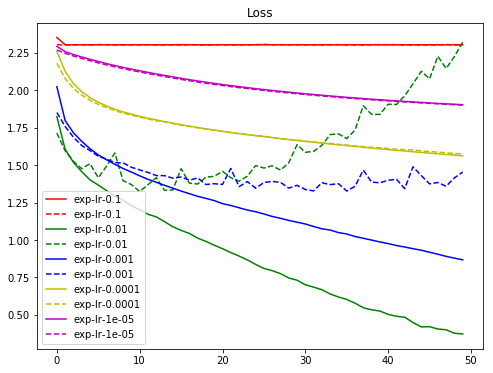

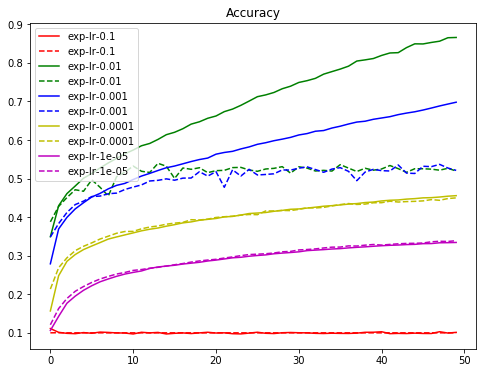

In [10]:
Draw_Result(results_sgd)

In [11]:
results_RMSprop = {}
for lr in LEARNING_RATE:
    ch = 1
    Training_model(ch, lr, results_RMSprop)

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 164us/step - loss: 14.4435 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 156us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 160us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 157us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 162us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 9s 173us/step - loss: 2.2012 - acc: 0.2179 - val_loss: 1.9441 - val_acc: 0.2992
Epoch 2/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.8866 - acc: 0.3176 - val_loss: 1.8756 - val_acc: 0.3218
Epoch 3/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.7828 - acc: 0.3574 - val_loss: 1.7891 - val_acc: 0.3466
Epoch 4/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.7139 - acc: 0.3873 - val_loss: 1.7974 - val_acc: 0.3580
Epoch 5/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.6564 - acc: 0.4079 - val_loss: 1.7629 - val_acc: 0.3748
Epoch 6/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6092 - acc: 0.4251 - val_loss: 1.5616 - val_acc: 0.4416
Epoch 7/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.5752 - acc: 0.4377 - val_loss: 1.6741 - val_acc: 0.4005
Epoch 8/50
50000/50000 [=====================

Epoch 2/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.8021 - acc: 0.3617 - val_loss: 1.7485 - val_acc: 0.3890
Epoch 3/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7186 - acc: 0.3911 - val_loss: 1.7687 - val_acc: 0.3758
Epoch 4/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6623 - acc: 0.4119 - val_loss: 1.6138 - val_acc: 0.4335
Epoch 5/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6173 - acc: 0.4308 - val_loss: 1.6198 - val_acc: 0.4335
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.5839 - acc: 0.4420 - val_loss: 1.7369 - val_acc: 0.3916
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5487 - acc: 0.4525 - val_loss: 1.5930 - val_acc: 0.4274
Epoch 8/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.5212 - acc: 0.4629 - val_loss: 1.5623 - val_acc: 0.4485
Epoch 9/50
50000/50000 [==========

Epoch 3/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8913 - acc: 0.3444 - val_loss: 1.8782 - val_acc: 0.3445
Epoch 4/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.8422 - acc: 0.3642 - val_loss: 1.8310 - val_acc: 0.3640
Epoch 5/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.8061 - acc: 0.3754 - val_loss: 1.7998 - val_acc: 0.3764
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.7777 - acc: 0.3848 - val_loss: 1.7814 - val_acc: 0.3752
Epoch 7/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.7535 - acc: 0.3921 - val_loss: 1.7547 - val_acc: 0.3946
Epoch 8/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.7323 - acc: 0.4011 - val_loss: 1.7334 - val_acc: 0.3993
Epoch 9/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.7136 - acc: 0.4066 - val_loss: 1.7209 - val_acc: 0.3992
Epoch 10/50
50000/50000 [=========

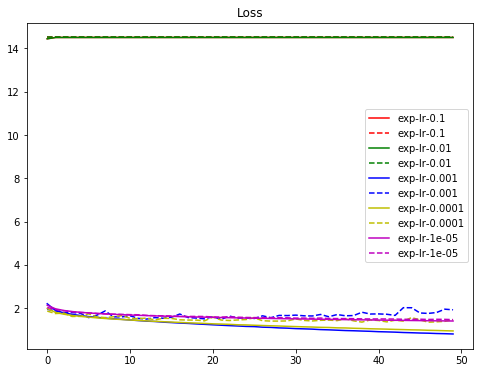

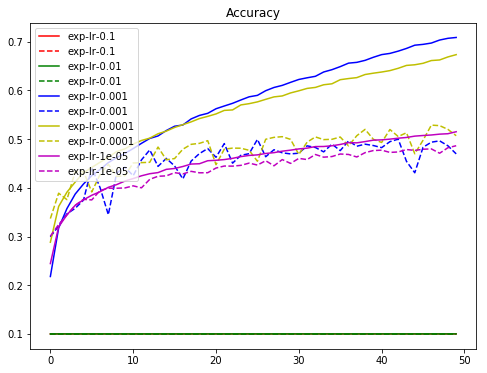

In [12]:
Draw_Result(results_RMSprop)

In [13]:
results_Adagrad = {}
for lr in LEARNING_RATE:
    ch = 2
    Training_model(ch, lr, results_Adagrad)

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 155us/step - loss: 14.4426 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 7s 147us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 145us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 147us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 8s 154us/step - loss: 2.0025 - acc: 0.2766 - val_loss: 1.8547 - val_acc: 0.3401
Epoch 2/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.8132 - acc: 0.3623 - val_loss: 1.8274 - val_acc: 0.3345
Epoch 3/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.7381 - acc: 0.3911 - val_loss: 1.7301 - val_acc: 0.3958
Epoch 4/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.6895 - acc: 0.4075 - val_loss: 1.6860 - val_acc: 0.3965
Epoch 5/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6522 - acc: 0.4211 - val_loss: 1.6561 - val_acc: 0.4160
Epoch 6/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6221 - acc: 0.4309 - val_loss: 1.6409 - val_acc: 0.4234
Epoch 7/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5972 - acc: 0.4389 - val_loss: 1.6145 - val_acc: 0.4223
Epoch 8/50
50000/50000 [=====================

Epoch 2/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.9353 - acc: 0.3304 - val_loss: 1.9108 - val_acc: 0.3455
Epoch 3/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.8891 - acc: 0.3455 - val_loss: 1.8783 - val_acc: 0.3550
Epoch 4/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.8611 - acc: 0.3555 - val_loss: 1.8540 - val_acc: 0.3604
Epoch 5/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.8401 - acc: 0.3633 - val_loss: 1.8356 - val_acc: 0.3693
Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.8238 - acc: 0.3685 - val_loss: 1.8211 - val_acc: 0.3700
Epoch 7/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.8106 - acc: 0.3726 - val_loss: 1.8092 - val_acc: 0.3772
Epoch 8/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7993 - acc: 0.3764 - val_loss: 1.8001 - val_acc: 0.3829
Epoch 9/50
50000/50000 [==========

Epoch 3/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.2196 - acc: 0.1901 - val_loss: 2.2099 - val_acc: 0.2009
Epoch 4/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.2033 - acc: 0.2018 - val_loss: 2.1950 - val_acc: 0.2095
Epoch 5/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.1900 - acc: 0.2110 - val_loss: 2.1829 - val_acc: 0.2214
Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.1791 - acc: 0.2182 - val_loss: 2.1727 - val_acc: 0.2274
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.1696 - acc: 0.2238 - val_loss: 2.1634 - val_acc: 0.2335
Epoch 8/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.1607 - acc: 0.2294 - val_loss: 2.1546 - val_acc: 0.2365
Epoch 9/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.1522 - acc: 0.2337 - val_loss: 2.1466 - val_acc: 0.2407
Epoch 10/50
50000/50000 [=========

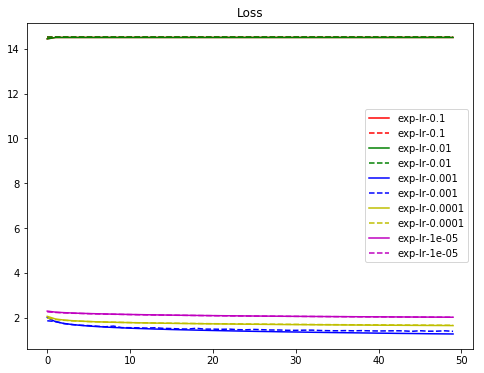

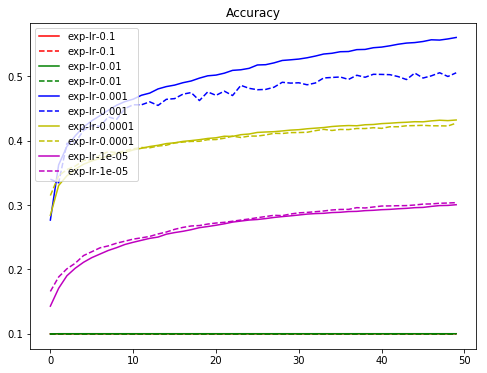

In [14]:
Draw_Result(results_Adagrad)

In [15]:
results_Adam = {}
for lr in LEARNING_RATE:
    ch = 3
    Training_model(ch, lr, results_Adam)

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 184us/step - loss: 14.4383 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 172us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 172us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 9s 188us/step - loss: 1.9587 - acc: 0.2974 - val_loss: 1.8181 - val_acc: 0.3357
Epoch 2/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.7276 - acc: 0.3841 - val_loss: 1.6771 - val_acc: 0.4024
Epoch 3/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.6311 - acc: 0.4196 - val_loss: 1.5961 - val_acc: 0.4332
Epoch 4/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.5588 - acc: 0.4442 - val_loss: 1.5919 - val_acc: 0.4298
Epoch 5/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.5253 - acc: 0.4580 - val_loss: 1.5282 - val_acc: 0.4517
Epoch 6/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.4861 - acc: 0.4708 - val_loss: 1.5360 - val_acc: 0.4477
Epoch 7/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.4477 - acc: 0.4843 - val_loss: 1.4605 - val_acc: 0.4835
Epoch 8/50
50000/50000 [=====================

Epoch 2/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.7214 - acc: 0.3935 - val_loss: 1.6583 - val_acc: 0.4227
Epoch 3/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6323 - acc: 0.4267 - val_loss: 1.6051 - val_acc: 0.4321
Epoch 4/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.5713 - acc: 0.4470 - val_loss: 1.5665 - val_acc: 0.4477
Epoch 5/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.5251 - acc: 0.4633 - val_loss: 1.5268 - val_acc: 0.4638
Epoch 6/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.4953 - acc: 0.4737 - val_loss: 1.4876 - val_acc: 0.4747
Epoch 7/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.4563 - acc: 0.4866 - val_loss: 1.4928 - val_acc: 0.4666
Epoch 8/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.4296 - acc: 0.5009 - val_loss: 1.4577 - val_acc: 0.4782
Epoch 9/50
50000/50000 [==========

Epoch 3/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.8599 - acc: 0.3574 - val_loss: 1.8300 - val_acc: 0.3542
Epoch 4/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.8053 - acc: 0.3746 - val_loss: 1.7855 - val_acc: 0.3773
Epoch 5/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.7672 - acc: 0.3872 - val_loss: 1.7556 - val_acc: 0.3842
Epoch 6/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.7352 - acc: 0.3980 - val_loss: 1.7260 - val_acc: 0.3982
Epoch 7/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.7087 - acc: 0.4072 - val_loss: 1.7041 - val_acc: 0.4003
Epoch 8/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.6865 - acc: 0.4122 - val_loss: 1.6840 - val_acc: 0.4073
Epoch 9/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6677 - acc: 0.4196 - val_loss: 1.6630 - val_acc: 0.4172
Epoch 10/50
50000/50000 [=========

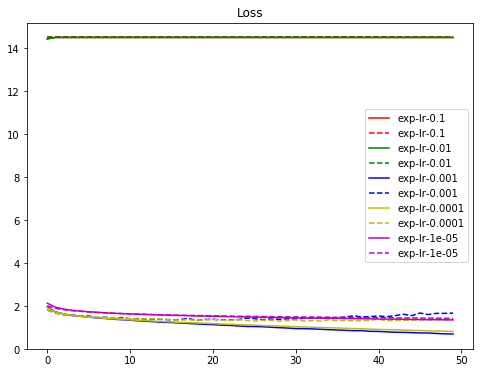

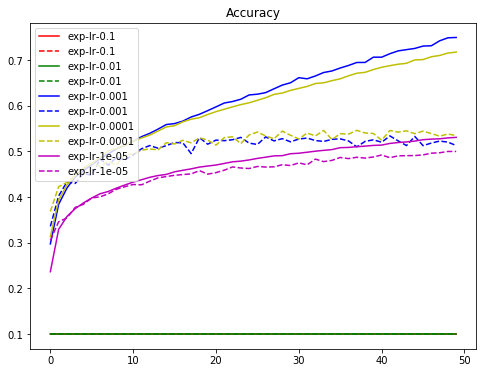

In [16]:
Draw_Result(results_Adam)

最高得分組合:
    
    Test loss: 1.3745511247634887
    Test accuracy: 0.5346
    
    LEARNING_RATE = 1e-4
    optimizer = Adam